# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mergedatadf = pd.merge(study_results, mouse_metadata, how= 'outer', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
mergedatadf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [10]:
# Checking the number of mice.
totalmice = len(mergedatadf['Mouse ID'].unique())

print(f'Total amount of mice in treatment program is: {totalmice}')

Total amount of mice in treatment program is: 249


In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemice = mergedatadf.duplicated(subset=['Mouse ID', 'Timepoint'], keep =False)

In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatemiceID = mergedatadf.loc[duplicatemice, 'Mouse ID'].unique()

duplicatemiceID = mergedatadf.loc[mergedatadf['Mouse ID'] == duplicatemiceID[0]]
duplicatemiceID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
analysisdatadf= mergedatadf.drop(duplicatemiceID.index)

analysisdatadf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [22]:
# Checking the number of mice in the clean DataFrame.
cleanmice = len(analysisdatadf['Mouse ID'].unique())
print(f'Number of mice in treatment after removing duplicates is: {cleanmice}')

Number of mice in treatment after removing duplicates is: 248


## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugregimen = analysisdatadf.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#Mean
mean = drugregimen['Tumor Volume (mm3)'].mean()

#median
median = drugregimen['Tumor Volume (mm3)'].median()

#variance
variance = drugregimen['Tumor Volume (mm3)'].var()

#standard deviation
standdev = drugregimen['Tumor Volume (mm3)'].std()

#SEM
sem = drugregimen['Tumor Volume (mm3)'].sem()

#combining all stats together
summarystatsdf = pd.DataFrame ({
    'Mean': mean,
    'Median' : median,
    'Variance' : variance,
    'Standard Deviation' : standdev,
    'SEM' : sem
})

summarystatsdf

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summarytable = drugregimen['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summaryaggressivedf = summarytable.rename(columns={
    'mean':'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard deviation',
    'sem': 'SEM'
})

summaryaggressivedf

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [28]:
#Calculating number of per Drug Regime
miceperregimen = drugregimen['Mouse ID'].count().sort_values(ascending=False)
miceperregimen

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Mouse ID, dtype: int64

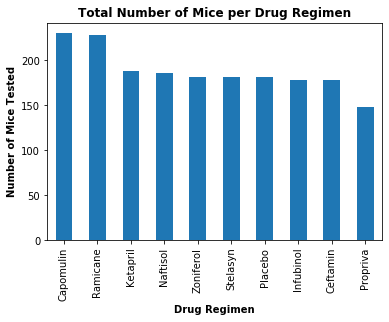

In [29]:

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
 
pdbarmiceperregimen = miceperregimen.plot(kind='bar', width=0.5)

# Set x/y label, title
pdbarmiceperregimen.set_title(label='Total Number of Mice per Drug Regimen', fontweight = 'bold')
pdbarmiceperregimen.set_xlabel('Drug Regimen', fontweight = 'bold')
pdbarmiceperregimen.set_ylabel('Number of Mice Tested', fontweight = 'bold')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()


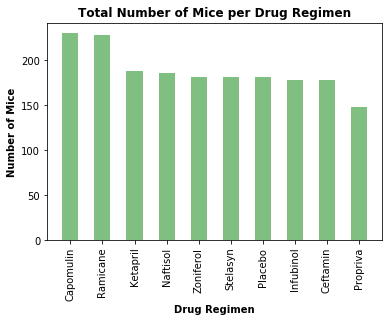

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set x axis
xaxisregimen = np.arange(len(miceperregimen))
regimenname = list(miceperregimen.index.values)
 
# Create bar chart
pybarmiceperregimen = plt.bar(xaxisregimen, miceperregimen, color='green', alpha=0.5, width=0.5)

# Set x/y label, title
plt.xticks(xaxisregimen, regimenname, rotation='vertical')
plt.title('Total Number of Mice per Drug Regimen', fontweight = 'bold')
plt.xlabel('Drug Regimen', fontweight = 'bold')
plt.ylabel('Number of Mice', fontweight = 'bold')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()


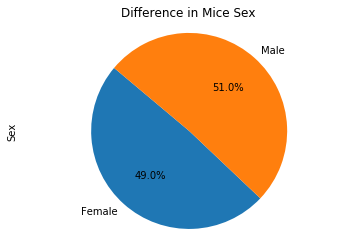

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sexmice = analysisdatadf.groupby('Sex')['Sex'].count()

pdpiesexmice = sexmice.plot(kind='pie', autopct='%1.1f%%', startangle=140)

#create axes which equal so circle is perfect
plt.axis("equal")

#set x/y labels and title
pdpiesexmice.set_title(label='Difference in Mice Sex')
pdpiesexmice.set_ylabel('Sex')

#show pie chart
plt.show()

#close pyplot
plt.close()

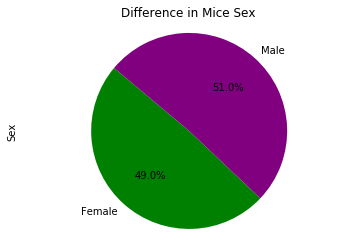

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# set x axis and colors
sex = sexmice.index
colors = ['green','purple']

# create pie chart
pybarsexmice = plt.pie(sexmice, labels=sexmice.index, autopct="%1.1f%%", colors=colors, startangle=140)

# create axes which equal so circle is perfect
plt.axis("equal")

# set x/y label, title
plt.title('Difference in Mice Sex')
plt.ylabel('Sex')

#show the pie chart
plt.show()

#close pyplot
plt.close()


## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
finaltumorvol = analysisdatadf.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
finaltumordf = finaltumorvol.reset_index()

In [53]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
finaltumorvollist = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    finaltumorvol = finaltumordf.loc[finaltumordf['Drug Regimen'] ==drug, 'Tumor Volume (mm3)']
    
    # add subset 
    finaltumorvollist.append(finaltumorvol)
    
    quartiles = finaltumorvol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = finaltumorvol.mean()
    iqr = upperq-lowerq    
    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq + (1.5*iqr)
    # Determine outliers using upper and lower bounds
    outliers = finaltumorvol.loc[(finaltumorvol < lowerbound)
                |(finaltumorvol > upperbound)]

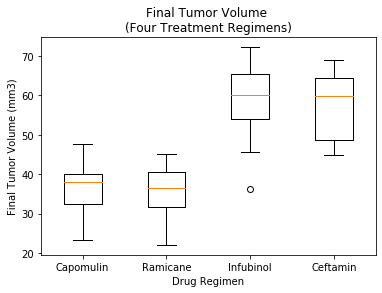

In [54]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
figone, finaltumorplot = plt.subplots()
finaltumorplot.boxplot(finaltumorvollist, labels = regimen)

#set x/y label, title
finaltumorplot.set_title('Final Tumor Volume \n(Four Treatment Regimens)')
finaltumorplot.set_xlabel('Drug Regimen')
finaltumorplot.set_ylabel('Final Tumor Volume (mm3)')


#show box plot chart
plt.show()

# close pyplot
plt.close()


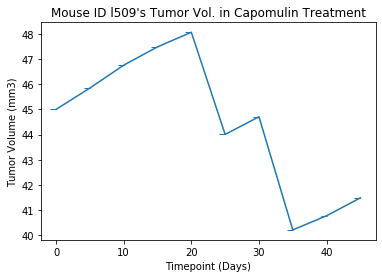

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulindf = analysisdatadf.loc[analysisdatadf['Drug Regimen'] == 'Capomulin']

#identify specific mouse ID and get data from mouse id
mouseid = 'l509'
mousedf = Capomulindf.loc[Capomulindf['Mouse ID'] == mouseid]

# generate a line plot
timevol = plt.plot(mousedf['Timepoint'], mousedf['Tumor Volume (mm3)'], marker =0)

#set x/y label, title
plt.title(f"Mouse ID {mouseid}'s Tumor Vol. in Capomulin Treatment")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

#show box plot chart
plt.show()

#close pyplot
plt.close()


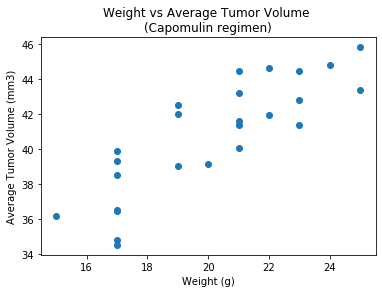

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#calculate mean of Weight (g) and Tumor Volume (mm3) based on Mouse ID
Capomulingp = Capomulindf.groupby('Mouse ID').mean()
miceweightavg = Capomulingp['Weight (g)']
micetumoravg = Capomulingp['Tumor Volume (mm3)']

#generate a scatter plot
plt.scatter(miceweightavg, micetumoravg)

#set x/y label, title
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#show scatter plot
plt.show()

#close pyplot
plt.close()



## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


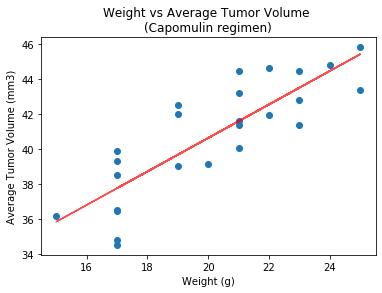

In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#define x and y values
xvalues = miceweightavg
yvalues = micetumoravg

#calculate the correlation
correlation = round(st.pearsonr(xvalues, yvalues)[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

#calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)

# y = mx + b
regressvalues = xvalues * slope + intercept
lineeq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regressvalues, color='r', alpha=0.7)

#r square formula
r_squared = round(rvalue**2,2)


#dfiene title and x/y labels
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#show chart
plt.show()

#close pyplot
plt.close()